[日本語Wikipedia](https://ja.wikipedia.org/)の「[人工知能](https://ja.wikipedia.org/wiki/%E4%BA%BA%E5%B7%A5%E7%9F%A5%E8%83%BD)」に関する記事からテキスト部分を抜き出したファイルが[ai.ja.zip](https://nlp100.github.io/data/ai.ja.zip)に収録されている．この文章を[CaboCha](https://taku910.github.io/cabocha/)や[KNP](http://nlp.ist.i.kyoto-u.ac.jp/index.php?KNP)等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [10]:
!curl https://raw.githubusercontent.com/suzuhiki/NLP100knocks/refs/heads/main/data/ai.ja/ai.ja.parsed.txt -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  6  533k    6 32768    0     0  64869      0  0:00:08 --:--:--  0:00:08 65274
100  533k  100  533k    0     0   962k      0 --:--:-- --:--:-- --:--:--  967k


In [8]:
# ai.ja.txt.parsedの作成

# import CaboCha

# CBC = CaboCha.Parser()
# divtext = []
# with open("[PATH]/ai.ja.txt", "r") as f, open("[PATH]/ai.ja.txt.parsed", "w") as f2:
#     lines = f.readlines()
#     for text in lines:
#         if "。" in text:
#             temp = text.split("。")
#             temp = [x + "。" for x in temp if x != ""]
#             divtext.extend(temp)
#     for text in divtext:
#         tree = CBC.parse(text)
#         f2.write(tree.toString(CaboCha.FORMAT_LATTICE))
        


# 40. **係り受け解析結果の読み込み（形態素）**
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [1]:
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

    def __str__(self):
        return f"{self.surface}\t{self.base}\t{self.pos}\t{self.pos1}"

def read_parsed_file(filename):
    sentences = []
    morphs = []
    
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.rstrip()
            
            # 空行は文の区切り
            if line == 'EOS':
                if morphs:
                    sentences.append(morphs)
                    morphs = []
                continue
                
            # 先頭が*の行は係り受け情報なのでスキップ
            if line.startswith('*'):
                continue
                
            # 形態素情報を取得
            parts = line.split('\t')
            if len(parts) < 2:
                continue
                
            surface = parts[0]
            attr = parts[1].split(',')
            
            if len(attr) > 7:
                pos = attr[0]
                pos1 = attr[1]
                base = attr[6]
                
                morph = Morph(surface, base, pos, pos1)
                morphs.append(morph)
    
    return sentences

# 解析結果ファイルを読み込む
sentences = read_parsed_file('ai.ja.txt.parsed')

# 最初の文の形態素を表示
if sentences:
    print("surface\tbase\tpos\tpos1")
    print("===========================")
    for morph in sentences[1]:
        print(morph)

surface	base	pos	pos1
人工	人工	名詞	一般
知能	知能	名詞	一般
（	（	記号	括弧開
じん	じん	名詞	一般
こうち	こうち	名詞	一般
のう	のう	助詞	終助詞
、	、	記号	読点
、	、	記号	読点
〈	〈	記号	括弧開
〉	〉	記号	括弧閉
）	）	記号	括弧閉
と	と	助詞	格助詞
は	は	助詞	係助詞
、	、	記号	読点
「	「	記号	括弧開
『	『	記号	括弧開
計算	計算	名詞	サ変接続
（	（	記号	括弧開
）	）	記号	括弧閉
』	』	記号	括弧閉
という	という	助詞	格助詞
概念	概念	名詞	一般
と	と	助詞	並立助詞
『	『	記号	括弧開
コンピュータ	コンピュータ	名詞	一般
（	（	記号	括弧開
）	）	記号	括弧閉
』	』	記号	括弧閉
という	という	助詞	格助詞
道具	道具	名詞	一般
を	を	助詞	格助詞
用い	用いる	動詞	自立
て	て	助詞	接続助詞
『	『	記号	括弧開
知能	知能	名詞	一般
』	』	記号	括弧閉
を	を	助詞	格助詞
研究	研究	名詞	サ変接続
する	する	動詞	自立
計算	計算	名詞	サ変接続
機	機	名詞	接尾
科学	科学	名詞	一般
（	（	記号	括弧開
）	）	記号	括弧閉
の	の	助詞	連体化
一	一	名詞	数
分野	分野	名詞	一般
」	」	記号	括弧閉
を	を	助詞	格助詞
指す	指す	動詞	自立
語	語	名詞	一般
。	。	記号	句点
「	「	記号	括弧開
言語	言語	名詞	一般
の	の	助詞	連体化
理解	理解	名詞	サ変接続
や	や	助詞	並立助詞
推論	推論	名詞	サ変接続
、	、	記号	読点
問題	問題	名詞	ナイ形容詞語幹
解決	解決	名詞	サ変接続
など	など	助詞	副助詞
の	の	助詞	連体化
知的	知的	名詞	一般
行動	行動	名詞	サ変接続
を	を	助詞	格助詞
人間	人間	名詞	一般
に	に	助詞	格助詞
代わっ	代わる	動詞	自立
て	て	助詞	接続助詞
コンピューター	コンピューター	名詞	一般
に	に	助詞	格助詞
行わ	行う	動詞	自立
せる	せる	動詞	接尾
技術	技術	名詞	一般
」	」	記号	括弧閉
、	、	記号	読点
または	または	接続詞	*
、	、	記号	読点
「	「	記号	括弧開
計算	計算	名詞	サ変接続
機	機	名

# 41. **係り受け解析結果の読み込み（文節・係り受け）**
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
class Chunk:
    def __init__(self, morphs=None, dst=-1):
        self.morphs = morphs if morphs else []
        self.dst = dst  # 係り先文節インデックス番号
        self.srcs = []  # 係り元文節インデックス番号のリスト

    def __str__(self):
        return "".join([morph.surface for morph in self.morphs])


def read_chunks(filename):
    sentences = []
    chunks = []
    chunk_dict = {}

    with open(filename, "r", encoding="utf-8") as f:
        current_chunk_id = None

        for line in f:
            line = line.rstrip()

            # 文の区切り
            if line == "EOS":
                if chunks:
                    # 係り元を設定
                    for i, chunk in enumerate(chunks):
                        if chunk.dst != -1:
                            chunks[chunk.dst].srcs.append(i)
                    sentences.append(chunks)
                    chunks = []
                    chunk_dict = {}
                continue

            # 係り受け情報の行
            if line.startswith("*"):
                # * 2 3D 0/1 -0.764538
                # chunk_id = 2, dst = 3
                cols = line.split(" ")
                current_chunk_id = int(cols[1])
                dst = int(cols[2].rstrip("D"))

                # 新しいChunkを作成
                chunk = Chunk(dst=dst)
                chunks.append(chunk)
                chunk_dict[current_chunk_id] = chunk
                continue

            # 形態素情報の行
            parts = line.split("\t")
            if len(parts) < 2:
                continue

            surface = parts[0]
            attr = parts[1].split(",")

            if len(attr) > 7:
                pos = attr[0]
                pos1 = attr[1]
                base = attr[6]

                morph = Morph(surface, base, pos, pos1)
                if current_chunk_id is not None and current_chunk_id in chunk_dict:
                    chunk_dict[current_chunk_id].morphs.append(morph)

    return sentences


# 解析結果ファイルを読み込む
chunks_sentences = read_chunks("ai.ja.txt.parsed")

# 最初の文の文節と係り先を表示
if chunks_sentences:
    first_sentence = chunks_sentences[1]  # 最初の本文を取得
    print("文節\t\t係り先")
    print("====================")
    for i, chunk in enumerate(first_sentence):
        chunk_str = str(chunk)
        if chunk.dst != -1:
            dst_str = str(first_sentence[chunk.dst])
        else:
            dst_str = "なし"
        print(f"{chunk_str}\t\t{dst_str}")

文節		係り先
人工知能		語。
（じんこうちのう、、		語。
		〈〉）とは、
〈〉）とは、		語。
「『計算		（）』という
（）』という		道具を
概念と		道具を
『コンピュータ		（）』という
（）』という		道具を
道具を		用いて
用いて		研究する
『知能』を		研究する
研究する		計算機科学
計算機科学		（）の
（）の		一分野」を
一分野」を		指す
指す		語。
語。		研究分野」とも
「言語の		推論、
理解や		推論、
推論、		問題解決などの
問題解決などの		知的行動を
知的行動を		代わって
人間に		代わって
代わって		行わせる
コンピューターに		行わせる
行わせる		技術」、または、
技術」、または、		研究分野」とも
「計算機		（コンピュータ）による
（コンピュータ）による		情報処理システムの
知的な		情報処理システムの
情報処理システムの		実現に関する
設計や		実現に関する
実現に関する		研究分野」とも
研究分野」とも		される。
される。		なし


# 42. **係り元と係り先の文節の表示**
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [3]:
def get_chunk_text_without_symbols(chunk):
    # 句読点などの記号を除いたテキストを取得
    return "".join([morph.surface for morph in chunk.morphs if morph.pos != "記号"])


# 係り元と係り先の文節をタブ区切りで表示
if chunks_sentences:
    for sentence in chunks_sentences:
        for chunk in sentence:
            # 係り先があるなら出力
            if chunk.dst != -1:
                source_text = get_chunk_text_without_symbols(chunk)
                dest_text = get_chunk_text_without_symbols(sentence[chunk.dst])

                # 空文字列でない場合のみ出力
                if source_text and dest_text:
                    print(f"{source_text}\t{dest_text}")

        # 各文の区切りとして空行を出力
        print()


人工知能	語
じんこうちのう	語
とは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される

日本大百科全書の	解説で
解説で	述べている
情報工学者通信工学者の	佐藤理史は
佐藤理史は	述べている
次のように	述べている

人間の	知的能力を
知的能力を	実現する
コンピュータ上で	実現する
実現する	技術ソフトウェアコンピュータシステム
様々な	技術ソフトウェアコンピュータシステム
技術ソフトウェアコンピュータシステム	ある
応用例は	ある
自然言語処理	機械翻訳かな漢字変換構文解析等
機械翻訳かな漢字変換構文解析等	専門家の
専門家の	推論判断を
推論判断を	模倣する
模倣する	エキスパートシステム
エキスパートシステム	画像認識等が
画像データを	解析して
解析して	検出抽出したりする
特定の	パターンを
パターンを	検出抽出したりする
検出抽出したりする	画像認識等が
画像認識等が	ある
ある	命名された
年に	命名された
ダートマス会議で	命名された
ジョンマッカーシーにより	命名された
命名された	使われている
現在では	使われている
記号処理を	用いた
用いた	知能の
知能の	記述を
記述を	する
主体と	する
する	研究での
情報処理や	研究での
研究での	アプローチという
アプローチという	意味あいでも
意味あいでも	使われている
使われている	ある
家庭用電気機械器具の	制御システムや
制御システムや	思考ルーチンも
ゲームソフトの	思考ルーチンも
思考ルーチンも	呼ばれる
こう	呼ばれる
呼ばれる	ことも
ことも	ある

プログラミング言語による	とい

# 43. **名詞を含む文節が動詞を含む文節に係るものを抽出**
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [4]:
def has_pos(chunk, pos):
    # 指定した品詞を含むかチェック
    return any(morph.pos == pos for morph in chunk.morphs)


def extract_noun_to_verb_dependencies(sentences):
    results = []

    for sentence in sentences:
        for chunk in sentence:
            # 名詞を含む文節が動詞を含む文節に係るパターンを抽出
            if has_pos(chunk, "名詞") and chunk.dst != -1:
                dest_chunk = sentence[chunk.dst]
                if has_pos(dest_chunk, "動詞"):
                    source_text = get_chunk_text_without_symbols(chunk)
                    dest_text = get_chunk_text_without_symbols(dest_chunk)

                    # 空文字列でない場合のみ追加
                    if source_text and dest_text:
                        results.append((source_text, dest_text))

    return results


# 名詞を含む文節が動詞を含む文節に係るものを抽出
noun_to_verb_deps = extract_noun_to_verb_dependencies(chunks_sentences)

# 結果を表示
for src, dst in noun_to_verb_deps:
    print(f"{src}\t{dst}")

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される
解説で	述べている
佐藤理史は	述べている
次のように	述べている
知的能力を	実現する
コンピュータ上で	実現する
技術ソフトウェアコンピュータシステム	ある
応用例は	ある
推論判断を	模倣する
画像データを	解析して
解析して	検出抽出したりする
パターンを	検出抽出したりする
画像認識等が	ある
年に	命名された
ダートマス会議で	命名された
ジョンマッカーシーにより	命名された
命名された	使われている
現在では	使われている
記号処理を	用いた
記述を	する
主体と	する
意味あいでも	使われている
思考ルーチンも	呼ばれる
ことも	ある
カウンセラーを	模倣した
プログラム	出されるが
人工無脳が	出されるが
引き合いに	出されるが
計算機に	させようという
役割を	させようという
エキスパートシステムと	呼ばれる
実現は	困難視されている
人間が	持つ
暗黙に	持つ
記述が	なり
問題と	なり
利用が	困難視されている
困難視されている	ある
アプローチとしては	知られているが
アプローチも	知られているが
差は	ある
記号的明示性に	ある
その後	集めた
注目を	集めた
経験を	行う
元に	行う
学習を	行う
手法も	ある
宇宙において	実装するという
言葉通り	実装するという
知性を	表現し
機械的に	表現し
表現し	実装するという
登場により	行った
流行を	超えて
社会に	浸透して
浸透して	行った
年にかけて	導入した
プレイヤーも	破り
麻雀では	なった
十段に	到達するなど
到達するなど	なった
最先端技術と	なった
人工知能は	呼ばれ
機械学習と	呼ばれ
ものが	ある
学習を	繰り返す
ことを	している
基本と	している
システム	関係している
経験に	基づく
手法であり	関係している
関係している	ある
手法としては	ある
ものが	ある
これらを	統合した
知的システムを	作る
試みも	なされている
推論ルールを	生成する
統計的学習を	生成する
元に	生成する
生成規則を通して	生成する
第次人工知能ブームでは	行われている
領域で	上回る
人工知能を	上回る
精度を	出しており
研究が	行わ

# 44. **係り受け木の可視化**
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，[Graphviz](http://www.graphviz.org/)等を用いるとよい．

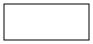

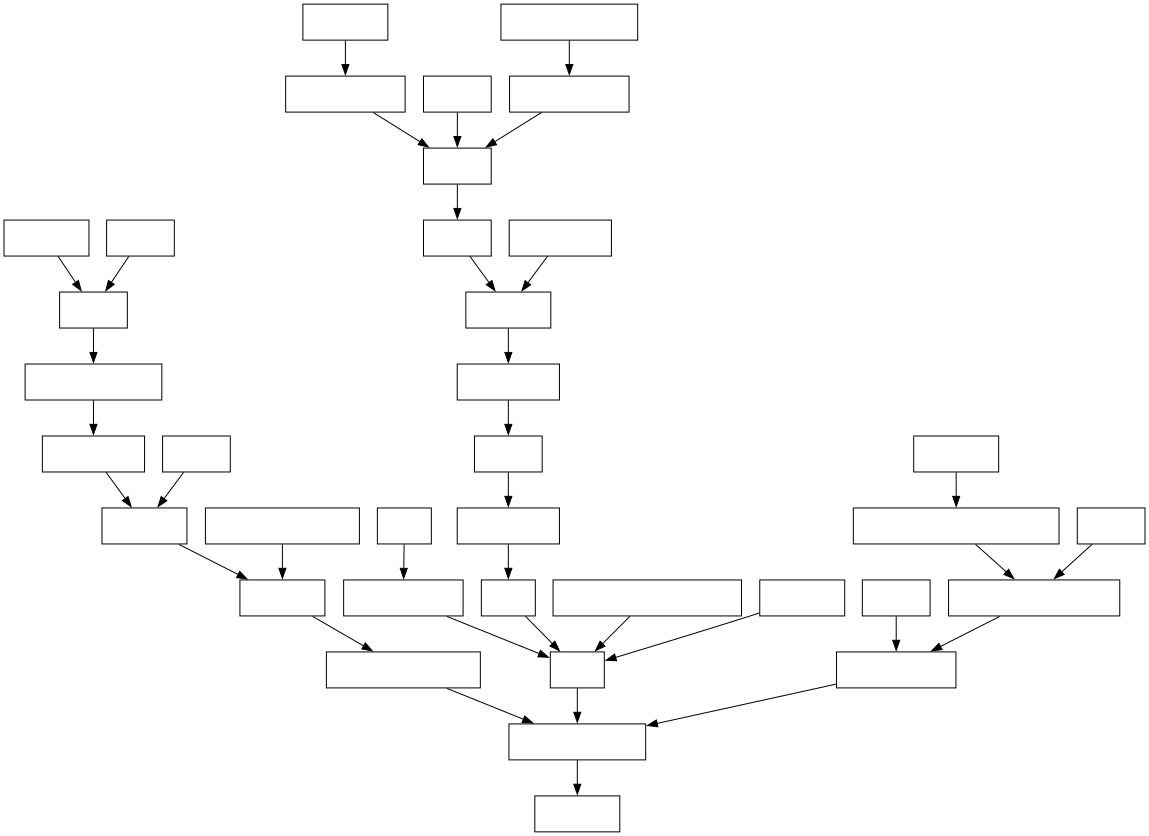

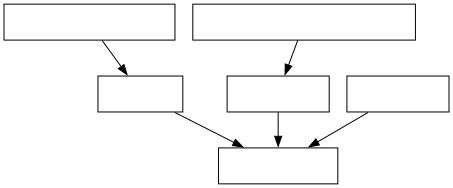

In [6]:
import graphviz
from IPython.display import display


def visualize_dependency_tree(sentence, sentence_id=0):
    """
    文の係り受け構造を可視化する

    Args:
        sentence: 係り受け解析された文（Chunkのリスト）
        sentence_id: 文のID（複数表示する場合に使用）
    """
    # Graphvizオブジェクトの作成
    dot = graphviz.Digraph(comment=f"Dependency Tree {sentence_id}", format="png")
    dot.attr("node", shape="box")  # fontname属性を削除
    
    # 各文節をノードとして追加
    for i, chunk in enumerate(sentence):
        chunk_text = str(chunk)
        dot.node(f"{i}", chunk_text)
    
    # 係り受け関係をエッジとして追加
    for i, chunk in enumerate(sentence):
        if chunk.dst != -1:
            dot.edge(f"{i}", f"{chunk.dst}")
    
    return dot


# 例として最初の3文を可視化
if chunks_sentences:
    for i, sentence in enumerate(chunks_sentences[:3]):
        graph = visualize_dependency_tree(sentence, i)
        display(graph)

# 45. **動詞の格パターンの抽出**
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

* 動詞を含む文節において，最左の動詞の基本形を述語とする
* 述語に係る助詞を格とする
* 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

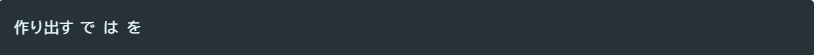
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

* コーパス中で頻出する述語と格パターンの組み合わせ
* 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）